In [30]:
import torch
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data - Preparing and Loading

* Excel Spreadsheets
* Images of any kind
* Videos (e.g. Youtube)
* DNAs
* Texts

Machine learning is a game of 2 parts:
1. Get data into a numerical representation
1. Build a model to learn patterns in the numerical representation

In [31]:
# Create known data using linear regression
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:5], y[:5], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 50,
 50)

In [32]:
# Splitting data into training and tests sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42069)

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [33]:
# Write a function to visualise our data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data, test data and compares predictions
    """

    plt. figure(figsize = (10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c= 'b', s=4, label = 'Training Data')
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c= 'g', s=4, label = 'Testing Data')

    # Plot predictions if exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s=4, label = 'Predictions')

    # Show our legends
    plt.legend()

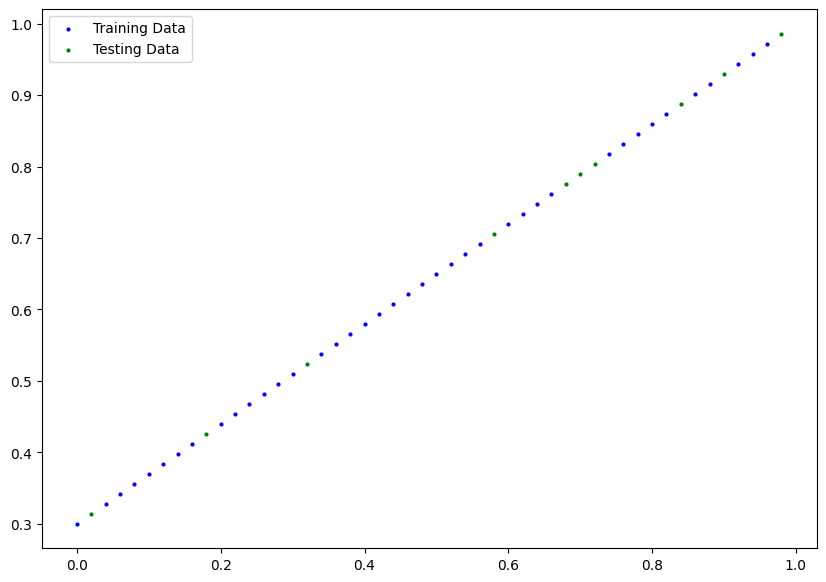

In [34]:
plot_predictions()

## Build simple PyTorch model

In [35]:
from torch import nn # nn contains all of pytorch's building blocks for neural networks

# Create linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module (Subclass nn.Module)
    def __init__(self):
        super().__init__()

        # Initialize model parameters. We can create whatever paremeters/ layers that we need for our model.
        self.weights = nn.Parameter(torch.randn(1,requires_grad= True,dtype = torch.float32))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype = torch.float32))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # Linear regression formula



## PyTorch model building essentials

* torch.nn - contains all the buildings for computational graphs (a nn is considered a computational graph)
* torch.nn.Parameter - what parameters should our models try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [36]:
# We can look what's inside the model using .parameters()

# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [37]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the forward() method. 

In [38]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Can do the same with no_grad but inference_mode is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)

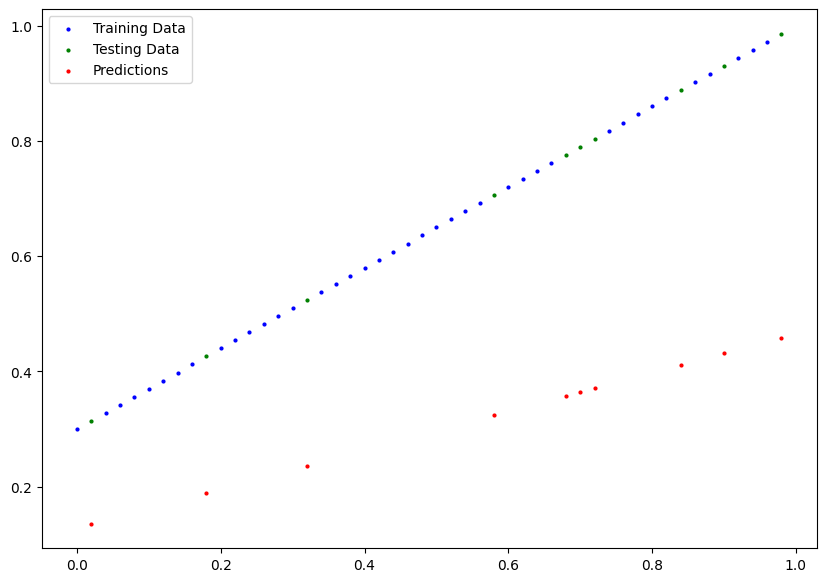

In [39]:
plot_predictions(predictions=y_preds)

## Train Model

In this section, we want to tran the model to move from some *unknown* parameters to some *known* parameters

Or in other words, from a poor representation of the data to a better representation of the data.

How do we measure how good the models' predictions are? Use a loss function.

Things we need to train:
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outpus, lower is better.
* **Optimizer:** Takes in to account the loss of a model and adjusts the model's parameters (e.g. weights and biases)

In [40]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer - Stochastic gradient descent
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # learning rate, possibility the most important hyperparameter you can set

## Building a training and testing loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions - also called forward propagation
1. Calculate the loss (compare forward pass predictions to ground truth labels)
1. Optimizer zero grad
1. Loss backward - move backwarsds through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
1. Optimizer step  - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [41]:
# An epoc his one loop through the data... (this is a hyperparameter because we've set these ourselves)
epochs = 200

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step teh optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 from 
    
    # Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/ batch norm layers)

    # print out model state_dict()
    # print(model_0.state_dict())



Loss: 0.3399479389190674
Loss: 0.3277903199195862
Loss: 0.315632700920105
Loss: 0.3034750819206238
Loss: 0.29131752252578735
Loss: 0.27915987372398376
Loss: 0.26700228452682495
Loss: 0.25484469532966614
Loss: 0.24268707633018494
Loss: 0.23052950203418732
Loss: 0.21837186813354492
Loss: 0.2062142789363861
Loss: 0.1940566897392273
Loss: 0.1818990707397461
Loss: 0.16974149644374847
Loss: 0.15758390724658966
Loss: 0.14542631804943085
Loss: 0.13326872885227203
Loss: 0.12155161052942276
Loss: 0.11082466691732407
Loss: 0.10174689441919327
Loss: 0.09382808953523636
Loss: 0.08721256256103516
Loss: 0.0814322754740715
Loss: 0.07617514580488205
Loss: 0.07165361195802689
Loss: 0.06809177249670029
Loss: 0.065065398812294
Loss: 0.06250905990600586
Loss: 0.06035236269235611
Loss: 0.05819566175341606
Loss: 0.05622955039143562
Loss: 0.05461534112691879
Loss: 0.053282011300325394
Loss: 0.05215667560696602
Loss: 0.05126987770199776
Loss: 0.050386667251586914
Loss: 0.04968825727701187
Loss: 0.0489898584783

In [42]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

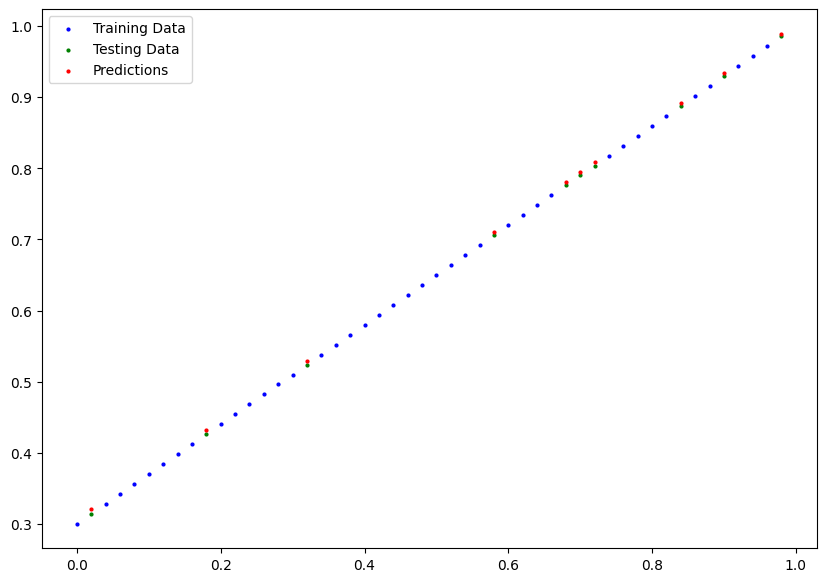

In [43]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know aout for saving and loading models in PyTorch.

1. `torch.save()` allows you to save a PyTorch object in Python's pickle format
1. `torch.load()` allows you to load a saved PyTorch object
1. `torch.nn.Module.load_state_dict()` allows you to load a model's saved state dictionary

In [44]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pt' # can be .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pt


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()`.

In [45]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [46]:
# Make some predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [47]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [48]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


### Implement everything we've learnt together

Data

In [49]:
# Create some data using linear regression
weight = 0.5
bias = 0.7

# Create range values
start = 0
end = 1
step = 0.01

# Create X and y (features and bias)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias

# Splitting data into training and tests sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 123)

Create a PyTorch model

In [50]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [51]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

Using device: cuda


device(type='cuda', index=0)

For training, we neeed:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [52]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)


In [53]:
# Training loop
torch.manual_seed(42)

epochs = 100

# Put data on the target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Back propagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.2630377411842346 | Test loss: 0.24029071629047394
Epoch: 10 | Loss: 0.13774962723255157 | Test loss: 0.11698267608880997
Epoch: 20 | Loss: 0.04771485924720764 | Test loss: 0.04373722895979881
Epoch: 30 | Loss: 0.033779218792915344 | Test loss: 0.031783219426870346
Epoch: 40 | Loss: 0.02851714752614498 | Test loss: 0.026621198281645775
Epoch: 50 | Loss: 0.023494238033890724 | Test loss: 0.021808747202157974
Epoch: 60 | Loss: 0.018475452437996864 | Test loss: 0.017061511054635048
Epoch: 70 | Loss: 0.013454660773277283 | Test loss: 0.012281665578484535
Epoch: 80 | Loss: 0.008435911498963833 | Test loss: 0.007534426636993885
Epoch: 90 | Loss: 0.003415081650018692 | Test loss: 0.002754583954811096


In [54]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

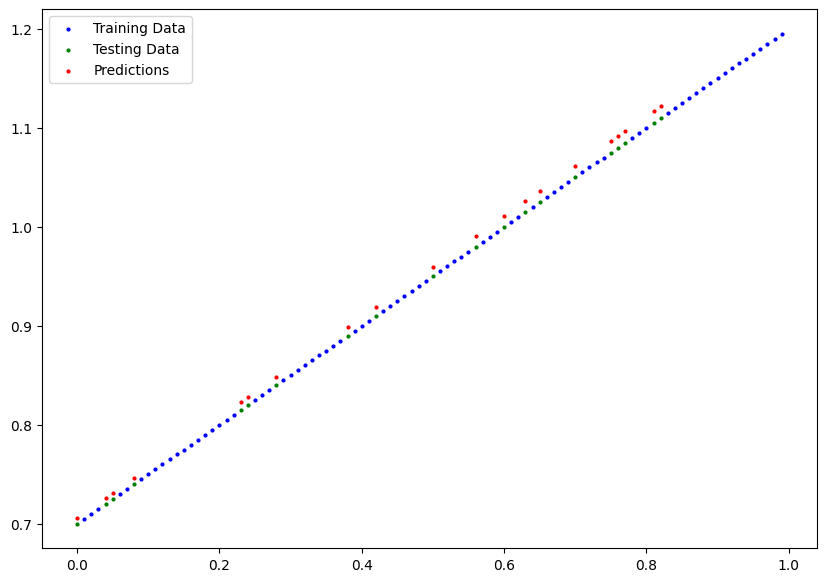

In [55]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions = y_preds.cpu())

### Saving and loading a trained model

In [56]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_NAME = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_NAME}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_NAME)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [63]:
# Load a PyTorch model

# Create a new instance of the regression model
loaded_model_1  = LinearRegressionModelV2()
# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_NAME))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [66]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [71]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5076]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.7060], device='cuda:0'))])

In [72]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')